In [1]:
# Import necessary packages
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Import necessary modules for deep leaning model
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
train_df.head()

,parcelid,logerror,transactiondate,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,storytypeid,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear
0,10711738,0.027600,2016-08-02,0.0,3.0,4.0,8.0,0.0,1928.5,2538.0,6037.0,0.0,3.0,0.0,0.0,0.0,2.0,34220381.0,-118620802.0,11012.0,1.0,495.0,0.0,0.0,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1978.0,1.0,0,248918.0,575759.0,326841.0,7219.18,0,0.0
1,10711755,-0.018200,2016-08-02,0.0,3.0,3.0,8.0,0.0,1207.4,1589.0,6037.0,0.0,3.0,0.0,0.0,0.0,2.0,34222040.0,-118622240.0,11010.0,1.0,495.0,0.0,0.0,1.0,0101,261.0,LARE11,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1959.0,1.0,0,344938.0,553219.0,208281.0,6901.09,0,0.0
2,10711805,-0.100900,2016-05-03,0.0,2.0,3.0,8.0,0.0,1832.0,2411.0,6037.0,0.0,2.0,0.0,0.0,0.0,2.0,34220427.0,-118618549.0,11723.0,1.0,495.0,0.0,0.0,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1973.0,1.0,0,238699.0,390654.0,151955.0,4876.61,0,0.0
3,10711816,-0.012100,2016-04-05,0.0,2.0,4.0,8.0,0.0,1696.0,2232.0,6037.0,0.0,2.0,0.0,0.0,0.0,2.0,34222390.0,-118618631.0,9002.0,0.0,0.0,0.0,0.0,0.0,0100,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1973.0,1.0,0,266309.0,443842.0,177533.0,5560.07,0,0.0
4,10711855,-0.007357,2017-07-07,0.0,2.0,3.0,8.0,0.0,1601.0,2107.0,6037.0,0.0,2.0,0.0,0.0,0.0,2.0,34222559.0,-118617387.0,9158.0,1.0,495.0,0.0,0.0,1.0,0101,261.0,LARE9,6.037113e+07,12447.0,3101.0,96339.0,0.0,0.0,0.0,1.0,0.0,0.0,1972.0,1.0,0,249655.0,624139.0,374484.0,7659.36,0,0.0


In [4]:
train_df.corr().logerror.sort_values(ascending=False)

logerror                        1.000000
calculatedfinishedsquarefeet    0.101609
finishedfloor1squarefeet        0.098919
bathroomcnt                     0.068997
fullbathcnt                     0.067298
structuretaxvaluedollarcnt      0.061193
taxvaluedollarcnt               0.057516
taxamount                       0.056270
landtaxvaluedollarcnt           0.047467
bedroomcnt                      0.046390
taxdelinquencyyear              0.025746
numberofstories                 0.018696
threequarterbathnbr             0.014686
decktypeid                      0.014439
buildingqualitytypeid           0.013905
garagetotalsqft                 0.012673
unitcnt                         0.010199
roomcnt                         0.008649
basementsqft                    0.008613
storytypeid                     0.006820
garagecarcnt                    0.005470
fireplacecnt                    0.004960
yardbuildingsqft26              0.004879
fips                            0.004417
rawcensustractan

In [5]:
top = list(train_df.corr().logerror.sort_values(ascending=False).index[0:6])

In [6]:
bottom = list(train_df.corr().logerror.sort_values(ascending=False).index[-6:-1])

In [7]:
#Based on the correlation
smaller_df= train_df[top + bottom]

In [8]:
smaller_df.head()

,logerror,calculatedfinishedsquarefeet,finishedfloor1squarefeet,bathroomcnt,fullbathcnt,structuretaxvaluedollarcnt,latitude,poolsizesum,pooltypeid7,poolcnt,propertylandusetypeid
0,0.027600,2538.0,1928.5,3.0,3.0,248918.0,34220381.0,495.0,1.0,1.0,261.0
1,-0.018200,1589.0,1207.4,3.0,3.0,344938.0,34222040.0,495.0,1.0,1.0,261.0
2,-0.100900,2411.0,1832.0,2.0,2.0,238699.0,34220427.0,495.0,1.0,1.0,261.0
3,-0.012100,2232.0,1696.0,2.0,2.0,266309.0,34222390.0,0.0,0.0,0.0,261.0
4,-0.007357,2107.0,1601.0,2.0,2.0,249655.0,34222559.0,495.0,1.0,1.0,261.0


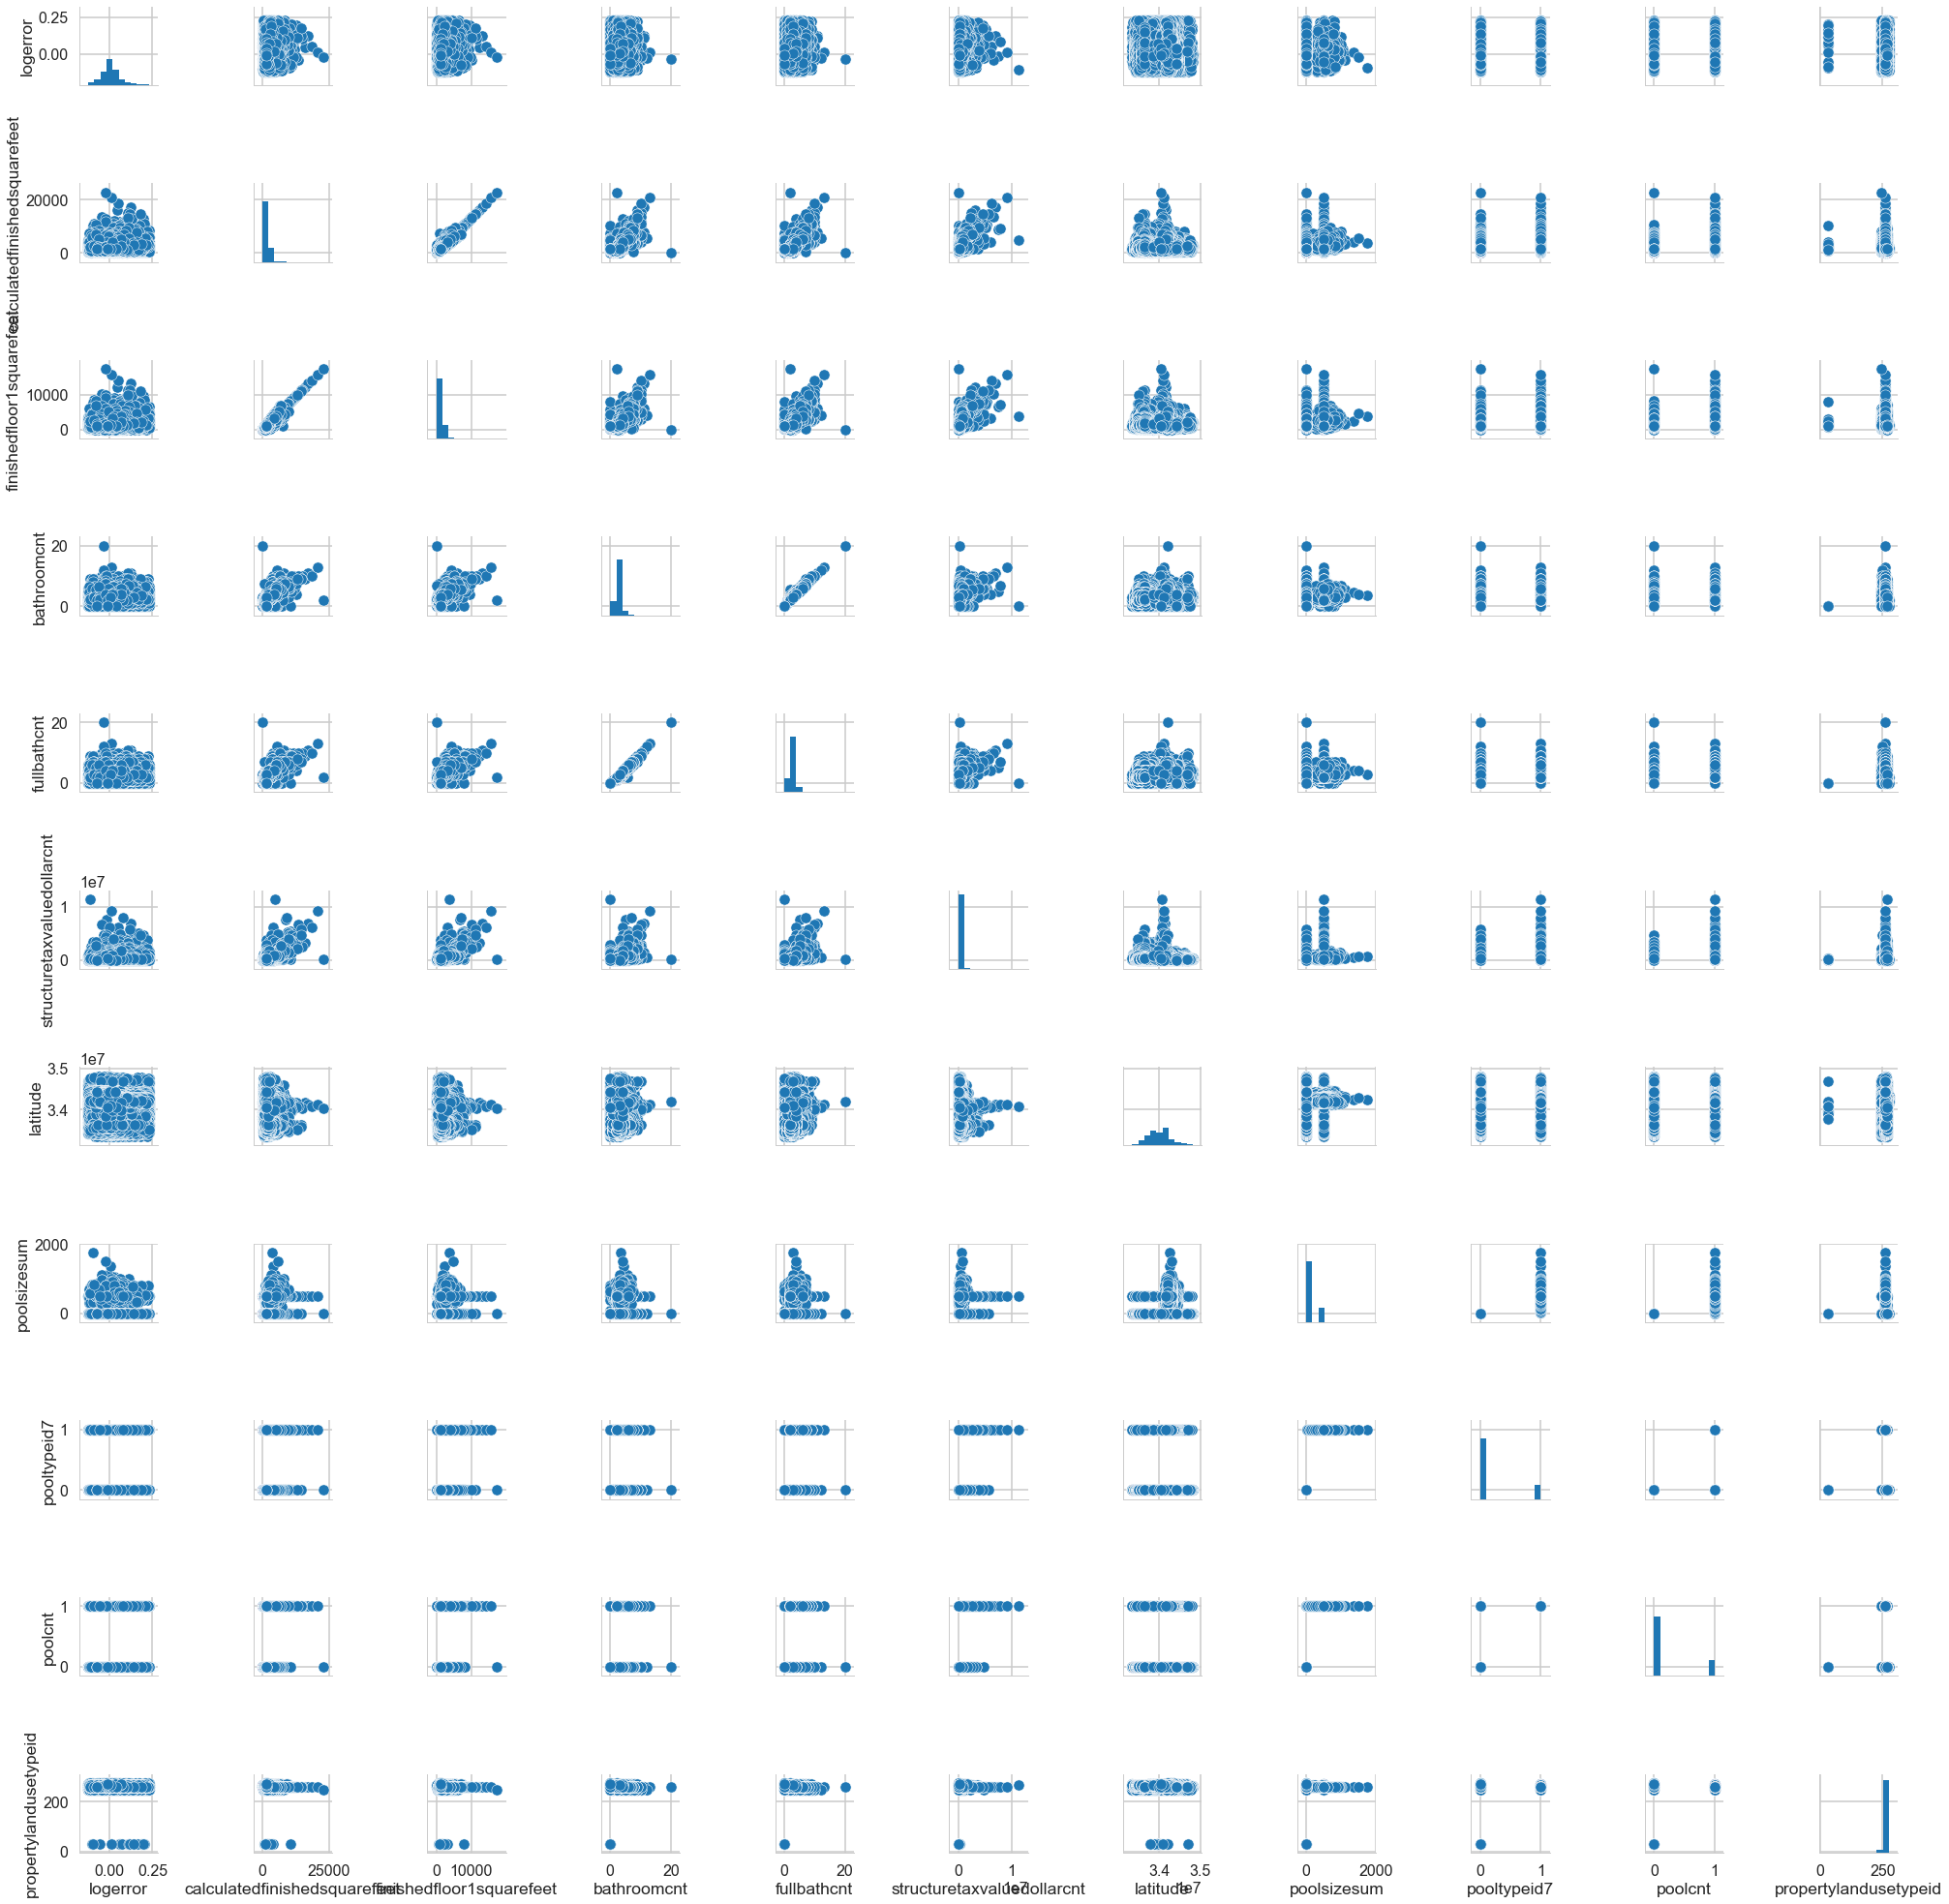

In [9]:
## Let's do a pairplot with seaborn to get a sense of the variables in this data set
sns.pairplot(smaller_df)

In [21]:
# Getting the data by dropping the object-typed data:
X_train = train_df.select_dtypes(exclude=[object]).drop(['logerror', 'parcelid'], axis=1)
y_train = train_df['logerror']
X_test = test_df.select_dtypes(exclude=[object]).drop(['logerror', 'parcelid'], axis=1)
y_test = test_df['logerror']

In [23]:
rf_model1 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
rf1_test_pred = rf_model1.predict(X_test)

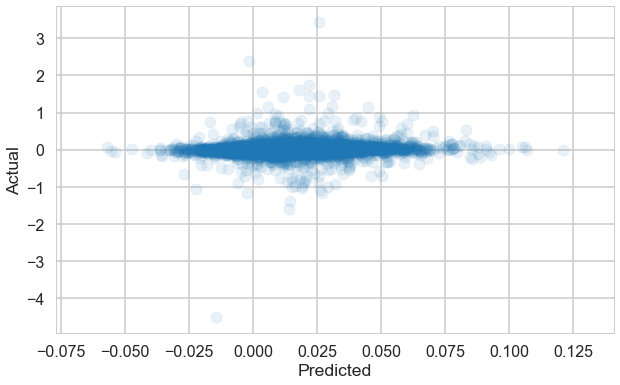

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(rf1_test_pred,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [26]:
def MAE(y, ypred):
    return np.sum([abs(y.iloc[i]-ypred[i]) for i in range(len(y))]) / len(y)

In [27]:
MAE(y_test, rf1_test_pred)

0.06315391833088026

In [28]:
# select the 5 most positive and negative features correlated to logerror for modeling:
X_train = train_df[top + bottom].drop(['logerror'], axis=1)
y_train = train_df['logerror']
X_test = test_df[top + bottom].drop(['logerror'], axis=1)
y_test = test_df['logerror']

In [29]:
rf_model2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [30]:
rf_test_pred2 = rf_model2.predict(X_test)

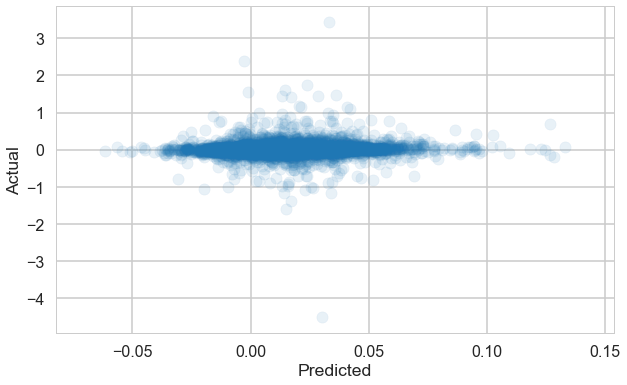

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(rf_test_pred2,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [32]:
MAE(y_test, rf_test_pred2)

0.06404915910957647

In [33]:
#columns are chosen based on EDA
col_name=['bathroomcnt', 'bedroomcnt', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'lotsizesquarefeet', 
'roomcnt', 'threequarterbathnbr', 'yardbuildingsqft17', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

In [58]:
X_train = train_df[col_name]
y_train = train_df['logerror']
X_test = test_df[col_name]
y_test = test_df['logerror']

In [35]:
rf_model3 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [36]:
rf_test_pred3 = rf_model3.predict(X_test)

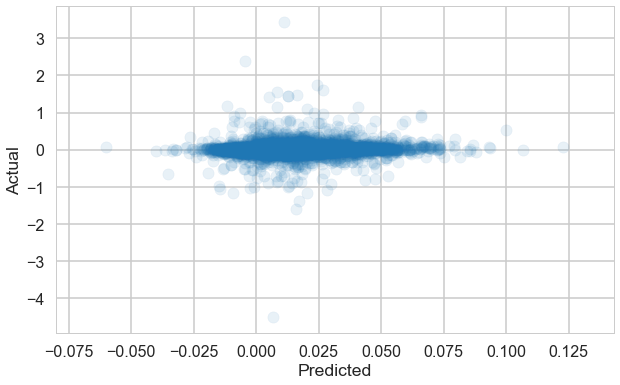

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(rf_test_pred3,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [38]:
MAE(y_test, rf_test_pred3)

0.06345101942881143

In [39]:
#Try linear regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
lr_model.coef_, lr_model.intercept_

(array([-8.38215883e-02, -1.63829889e-03,  7.22704225e-08,  9.78003103e-06,
        -2.07872723e-03,  8.31604991e-02, -4.53277392e-04, -9.50045570e-06,
         3.02632218e-09,  7.23136738e-04,  4.25871588e-02, -1.05540447e-05,
         1.76615180e-04,  2.04066579e+05, -2.04066579e+05,  2.04066579e+05,
        -8.69573550e-07]), 0.0031100163120806722)

In [41]:
test_set_pred = lr_model.predict(X_test)

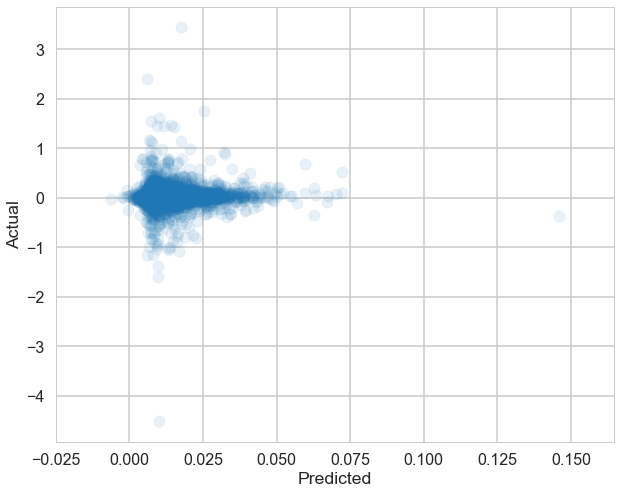

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred,y_test,alpha=.1)
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [43]:
MAE(y_test, test_set_pred)

0.06276916172129747

## Normalization 

In [44]:
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [45]:
lr_model.fit(normalized_X,y_train)
test_set_pred = lr_model.predict(normalized_X_test)
MAE(y_test, test_set_pred)

0.06298936221627804

In [55]:
len(normalized_X)

143613

In [57]:
len(train_df['logerror'])

143613

In [56]:
len(y_train)

129251

In [59]:
rf_model4 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)
rf_model4.fit(normalized_X, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
rf_test_pred4 = rf_model4.predict(normalized_X_test)

In [61]:
MAE(y_test, rf_test_pred4)

0.06350654980495324

In [62]:
# split the train data set into a training(90%) and validation set (10%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [63]:
num_estimators = [10,20,40,100,200,400]
est_list = []
MAE_list = list()

for est in num_estimators:
    my_rf_model = RandomForestRegressor(n_estimators = est)
    my_rf_model.fit(X_train, y_train)
    y_pred = my_rf_model.predict(X_valid)
    mae = MAE(y_valid, y_pred)
    est_list.append(est)
    MAE_list.append(mae)

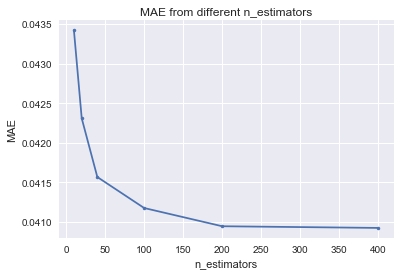

In [64]:
sns.set()

_ = plt.plot(est_list, MAE_list, marker='.')
_ = plt.title('MAE from different n_estimators')
_ = plt.xlabel('n_estimators')
_ = plt.ylabel('MAE')
plt.show()

In [65]:
print(my_rf_model.feature_importances_)

[0.0186236  0.03124901 0.0932616  0.0998132  0.00481329 0.01210082
 0.00638728 0.0226809  0.15304634 0.0114305  0.00389016 0.00500032
 0.00378232 0.14831349 0.11532424 0.12694185 0.14334109]


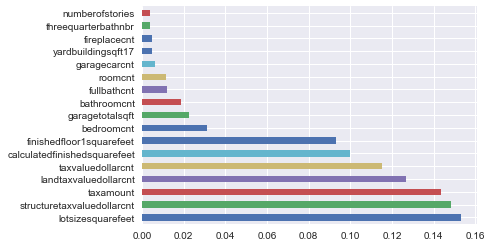

In [66]:
pd.Series(my_rf_model.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

In [67]:
num_estimators = [10,20,40,100,200,400]
est_list = []
MAE_list = list()

for est in num_estimators:
    my_rf_model = RandomForestRegressor(n_estimators = est, n_jobs=-1)
    my_rf_model.fit(X_train, y_train)
    y_pred = my_rf_model.predict(X_valid)
    mae = MAE(y_valid, y_pred)
    est_list.append(est)
    MAE_list.append(mae)

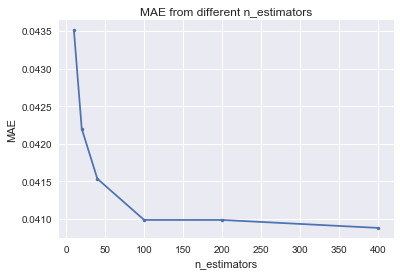

In [68]:
sns.set()

_ = plt.plot(est_list, MAE_list, marker='.')
_ = plt.title('MAE from different n_estimators')
_ = plt.xlabel('n_estimators')
_ = plt.ylabel('MAE')
plt.show()

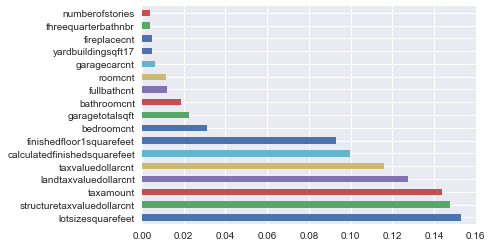

In [69]:
pd.Series(my_rf_model.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

In [70]:
top_features = pd.Series(my_rf_model.feature_importances_, index=X_train.columns).nlargest(20).index

In [71]:
X_train = X_train[top_features]
X_valid = X_valid[top_features]

In [72]:
my_rf_model = RandomForestRegressor(n_estimators = 400, n_jobs=-1)
my_rf_model.fit(X_train, y_train)
y_pred = my_rf_model.predict(X_valid)
mae = MAE(y_valid, y_pred)

In [73]:
mae

0.04091233353452532

# Tune the hyperparameters

In [74]:
#To see which settings we can tune
my_rf_model.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
## Setup the hyperparameter grid
param_grid = {
    'n_estimators':[10,20,40,100,200,400],
    'max_features':['sqrt', 'log2', None],
    'n_jobs':[-1, None]
}  

grid = GridSearchCV(my_rf_model, param_grid=param_grid, cv=3)  
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 40, 100, 200, 400], 'max_features': ['sqrt', 'log2', None], 'n_jobs': [-1, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
print("Tuned Hyperparameter: {}".format(grid.best_params_)) 
print("Best cv score is {}".format(grid.best_score_))

# Print the accuracy from the testing data.
print('Accuracy score:', MAE(y_valid, grid.predict(X_valid)))

Tuned Hyperparameter: {'max_features': 'sqrt', 'n_estimators': 400, 'n_jobs': -1}
Best cv score is -0.00636743352047079
Accuracy score: 0.04072714867015969


# Deep Learning

In [77]:
# convert the dataframe to NumPy matrix
predictors = X_train.values
target = y_train.values

In [78]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

In [79]:
# Specify the model
n_cols = predictors.shape[1]
input_shape = (n_cols,)
model1 = Sequential()
model1.add(Dense(1000, activation='relu', input_shape = input_shape))
model1.add(Dense(1000, activation='relu'))
model1.add(Dense(1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model1.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

Train on 90475 samples, validate on 38776 samples
Epoch 1/10
90475/90475 [==============================] - 24s 262us/step - loss: 187310312.1283 - acc: 1.1053e-05 - val_loss: 102278.1380 - val_acc: 1.2895e-04
Epoch 2/10
90475/90475 [==============================] - 23s 254us/step - loss: 749136.9885 - acc: 1.1053e-05 - val_loss: 642257.6310 - val_acc: 0.0000e+00
Epoch 3/10
90475/90475 [==============================] - 23s 260us/step - loss: 326231.6971 - acc: 9.9475e-05 - val_loss: 152143.1234 - val_acc: 0.0000e+00


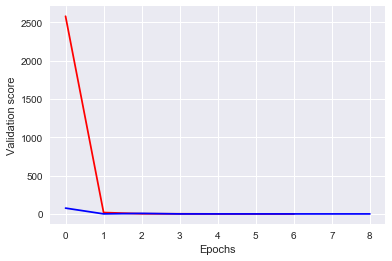

In [81]:
# Create the new model: model_2
model_2 = Sequential()
model_2.add(Dense(1000, activation='relu', input_shape=input_shape))
model_2.add(Dense(1000, activation='relu'))
model_2.add(Dense(1000, activation='relu'))
model_2.add(Dense(1))

# Compile model_2
model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Fit original model
model_1_training = model1.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor], verbose=False)   
# Fit model_2
model_2_training = model_2.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor], verbose=False)
          
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [82]:
model_3 = Sequential()
model_3.add(Dense(1000, activation='relu', input_shape=input_shape))
model_3.add(Dense(1000, activation='relu'))
model_3.add(Dense(1000, activation='relu'))
model_3.add(Dense(1))
model_3.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_3.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

Train on 90475 samples, validate on 38776 samples
Epoch 1/10
90475/90475 [==============================] - 38s 424us/step - loss: 272.0367 - acc: 0.0046 - val_loss: 0.0407 - val_acc: 0.0058
Epoch 2/10
90475/90475 [==============================] - 38s 418us/step - loss: 0.0408 - acc: 0.0052 - val_loss: 0.0405 - val_acc: 0.0058
Epoch 3/10
90475/90475 [==============================] - 38s 421us/step - loss: 5.7526 - acc: 0.0051 - val_loss: 0.0410 - val_acc: 0.0058
Epoch 4/10
90475/90475 [==============================] - 38s 422us/step - loss: 0.0406 - acc: 0.0052 - val_loss: 0.0401 - val_acc: 0.0058
Epoch 5/10
90475/90475 [==============================] - 38s 425us/step - loss: 0.0406 - acc: 0.0052 - val_loss: 0.0401 - val_acc: 0.0058
Epoch 6/10
90475/90475 [==============================] - 38s 417us/step - loss: 0.0406 - acc: 0.0052 - val_loss: 0.0409 - val_acc: 0.0058


In [83]:
y_pred = model_3.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.0410191353076913

In [85]:
y_pred = model_4.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.04039521423858315

In [ ]:
model_4 = Sequential()
model_4.add(Dense(1000, activation='relu', input_shape=input_shape))
model_4.add(Dense(1000, activation='relu'))
model_4.add(Dense(1000, activation='relu'))
model_4.add(Dense(1000, activation='relu'))
model_4.add(Dense(1))
model_4.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_4.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

In [86]:
model_5 = Sequential()
model_5.add(Dense(1100, activation='relu', input_shape=input_shape))
model_5.add(Dense(1100, activation='relu'))
model_5.add(Dense(1100, activation='relu'))
model_5.add(Dense(1))
model_5.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_5.fit(predictors, target, validation_split=0.3,  epochs=10, callbacks=[early_stopping_monitor])

Train on 90475 samples, validate on 38776 samples
Epoch 1/10
90475/90475 [==============================] - 50s 553us/step - loss: 318.9730 - acc: 0.0048 - val_loss: 0.0401 - val_acc: 0.0058
Epoch 2/10
90475/90475 [==============================] - 50s 550us/step - loss: 0.0405 - acc: 0.0052 - val_loss: 0.0408 - val_acc: 0.0058
Epoch 3/10
90475/90475 [==============================] - 49s 539us/step - loss: 0.0405 - acc: 0.0052 - val_loss: 0.0402 - val_acc: 0.0058


In [87]:
y_pred = model_5.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.04163832638592727

In [92]:
model_6 = Sequential()
model_6.add(Dense(1100, activation='relu', input_shape=input_shape))
model_6.add(Dropout(0.2))
model_6.add(Dense(1100, activation='relu'))
model_6.add(Dense(1100, activation='relu'))
model_6.add(Dense(1))
model_6.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_6.fit(predictors, target, validation_split=0.3,  epochs=2)

Train on 90475 samples, validate on 38776 samples
Epoch 1/2
90475/90475 [==============================] - 49s 541us/step - loss: 221.0326 - acc: 0.0043 - val_loss: 0.0402 - val_acc: 0.0058
Epoch 2/2
90475/90475 [==============================] - 56s 624us/step - loss: 0.0856 - acc: 0.0052 - val_loss: 0.0404 - val_acc: 0.0058


In [93]:
y_pred = model_6.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.04046386922738825

In [94]:
model_7 = Sequential()
model_7.add(Dense(1100, activation='relu', input_shape=input_shape))
model_7.add(Dropout(0.2))
model_7.add(Dense(1100, activation='relu'))
model_7.add(Dropout(0.2))
model_7.add(Dense(1100, activation='relu'))
model_7.add(Dense(1))
model_7.compile(optimizer='adam', loss='MAE', metrics=['accuracy'])
model_7.fit(predictors, target, validation_split=0.3,  epochs=2)

Train on 90475 samples, validate on 38776 samples
Epoch 1/2
90475/90475 [==============================] - 54s 601us/step - loss: 274.9106 - acc: 0.0046 - val_loss: 0.0401 - val_acc: 0.0058
Epoch 2/2
90475/90475 [==============================] - 51s 569us/step - loss: 0.0816 - acc: 0.0052 - val_loss: 0.0401 - val_acc: 0.0058


In [95]:
y_pred = model_7.predict(X_valid)
mae = MAE(y_valid, y_pred)
mae

0.04020739152826252